# BDA-500 Final Project: COVID-19 Dataset - Moshe Rubin

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the COVID Testing Data Excel file.
df = pd.read_excel(
    "BDA 500 - COVID Testing Data.xlsx", sheet_name="COVID_Testing_Date"  # sic
)

## Data Cleaning and Processing from Modules 4 and 5

In [3]:
# Clean the "Temperature" column.
valid_temps = df.eval("90 < Temperature < 110 or Temperature.isna()")
invalid_temps = ~valid_temps

df.loc[invalid_temps, "Temperature"] = np.nan

In [4]:
# Clean the "Age" column.
df["Age"] = pd.to_numeric(df["Age"], errors="coerce").astype("Int64")

valid_ages = df.eval("0 < Age < 120 or Age.isna()")
invalid_ages = ~valid_ages

df.loc[invalid_ages, "Age"] = np.nan

In [5]:
# Clean the "Test_Administrator" column.
df.loc[df["Test_Administrator"] == "ID-", "Test_Administrator"] = np.nan

In [6]:
# Recalculate the "Age_60_And_Above" column for accuracy
df["Age_60_And_Above"] = (df["Age"] >= 60).fillna(False)

In [7]:
# Recalculate the "Fever" column for accuracy
has_fever = df["Temperature"] >= 100
no_fever = df["Temperature"] < 100
no_temp = df["Temperature"].isna()

df.loc[has_fever, "Fever"] = 1
df.loc[no_fever, "Fever"] = 0
df.loc[no_temp, "Fever"] = pd.NA
df["Fever"] = df["Fever"].astype("Int64")

In [8]:
# Bin the Age variable into a new variable using your chosen bins
# Add an "age_quartile" column to our DataFrame. We'll use the labels
# `["Q1", "Q2","Q3", "Q4"]`.
df["age_quartile"] = pd.qcut(df["Age"], 4, precision=0, labels=["Q1", "Q2", "Q3", "Q4"])

In [9]:
# Transform the Date variable into a new variable with "Weekday" or "Weekend" bins
DOW = df["Date"].dt.strftime("%a")
df["weekend_weekday"] = DOW.replace(
    regex={"Sat|Sun": "Weekend", "Mon|Tue|Wed|Thu|Fri": "Weekday"}
)

In [10]:
# Preview our processed DataFrame
df

,Cough,Fever,Temperature,Sore_Throat,Shortness_Of_Breath,Headache,Age,Age_60_And_Above,Sex,Contact,Result,Date,Test_Administrator,Patient_Experience_Survey,Test_Type,age_quartile,weekend_weekday
0,0,0,98.6,0,0,0,1,False,female,0,positive,2021-11-27,ID-707,Neutral,1.0,Q1,Weekend
1,0,0,98.6,0,0,0,1,False,female,0,negative,2021-11-27,ID-707,Dissatisfied,1.0,Q1,Weekend
2,0,<NA>,NaN,0,0,0,2,False,female,0,negative,2021-11-02,ID-102,Satisfied,1.0,Q1,Weekday
3,0,0,98.6,0,0,0,2,False,male,0,negative,2021-11-27,ID-102,Very Satisfied,1.0,Q1,Weekend
4,0,0,98.6,0,0,0,2,False,male,0,negative,2021-11-27,ID-707,Satisfied,1.0,Q1,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0,1,101.4,0,0,0,<NA>,False,male,0,positive,2021-11-11,ID-506,Neutral,1.0,NaN,Weekday
1067,0,0,98.7,0,0,0,<NA>,False,female,0,negative,2021-11-16,ID-707,Dissatisfied,1.0,NaN,Weekday
1068,0,0,98.7,0,0,0,<NA>,False,male,0,negative,2021-11-13,ID-707,Satisfied,1.0,NaN,Weekend
1069,0,0,98.7,0,0,0,<NA>,False,male,0,positive,2021-11-16,ID-707,Neutral,1.0,NaN,Weekday


## Regenerate Plots from Mod 5 Assignment

In [11]:
# Before we start plotting, let's separate out the Boolean columns that won't look super
# nice with traditional numeric plotting.
bool_cols = [
    "Cough",
    "Fever",
    "Sore_Throat",
    "Shortness_Of_Breath",
    "Headache",
    "Age_60_And_Above",
    "Contact",
]

# The `bool_cols`, plus a few others, make up all of our categories.
categorical_cols = bool_cols + [
    "Sex",
    "Result",
    "Test_Administrator",
    "Patient_Experience_Survey",
    "Test_Type",
    "age_quartile",
    "weekend_weekday",
]

# Create a subset called `columns_good_for_plotting` that has no Boolean columns.
columns_good_for_plotting = df.drop(columns=categorical_cols)

Cough


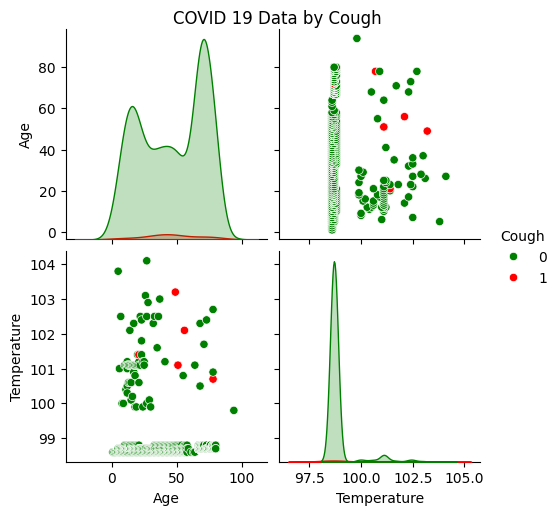




Fever


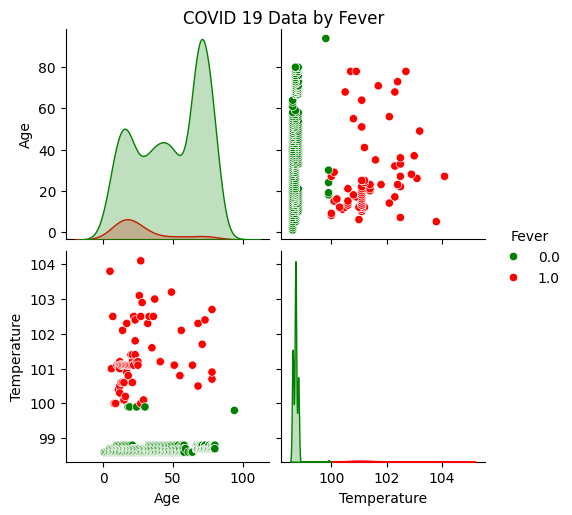




Sore_Throat


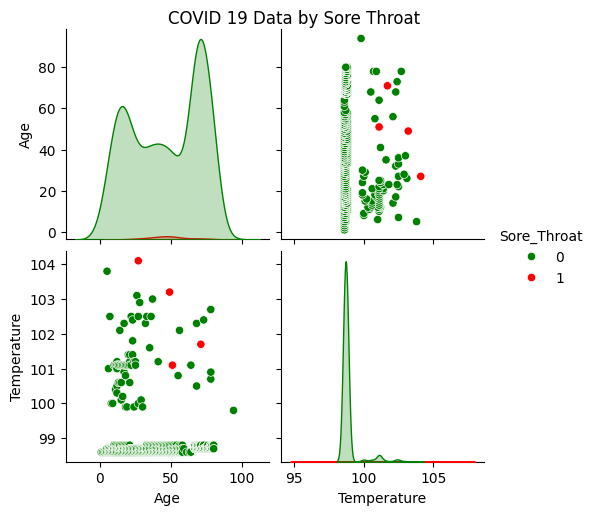




Shortness_Of_Breath


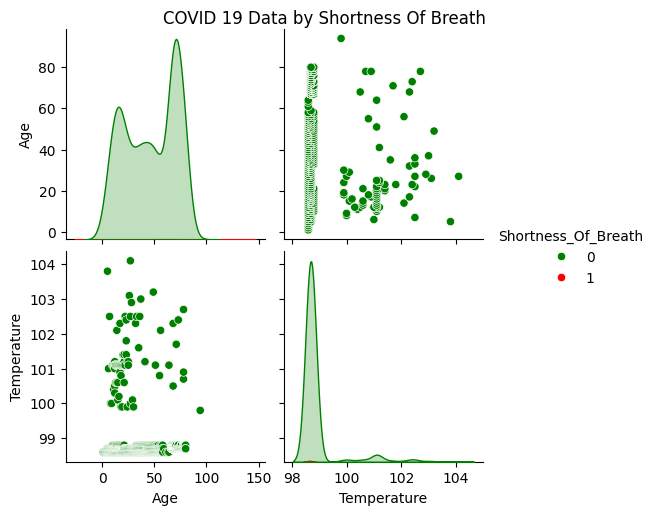




Headache


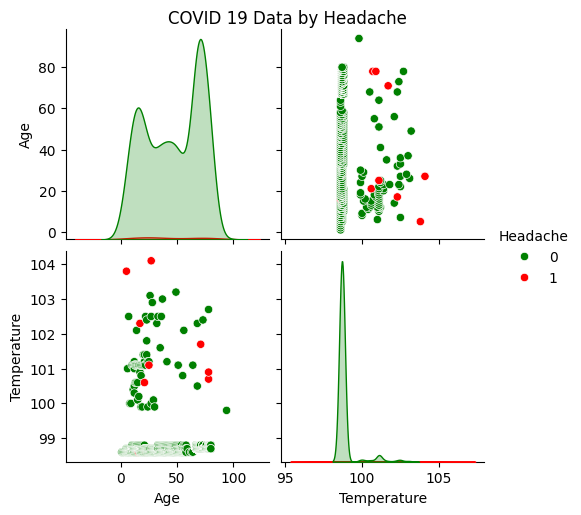




Age_60_And_Above


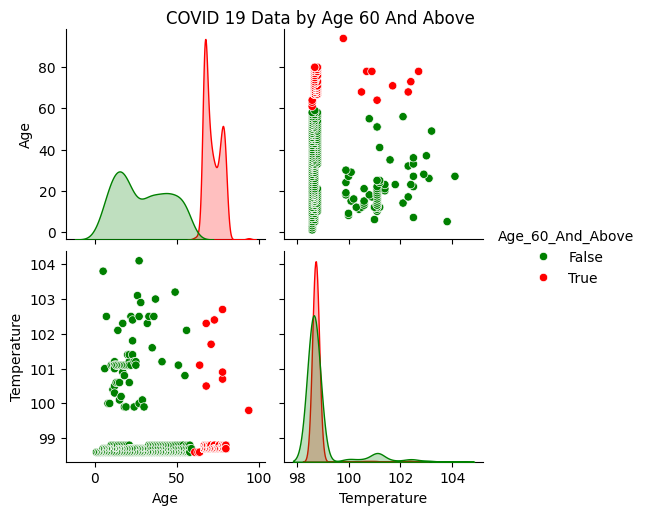




Contact


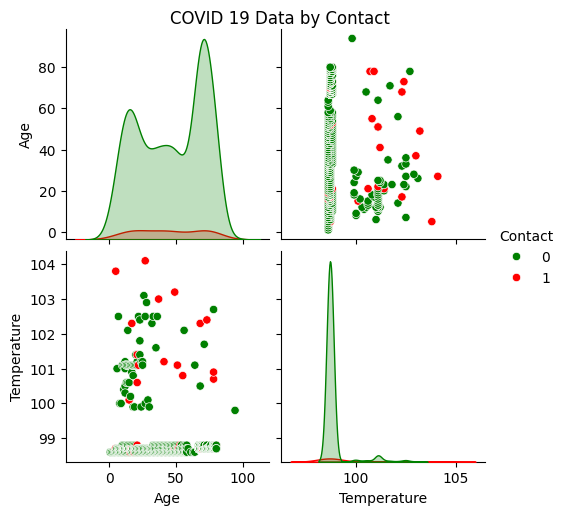




Sex


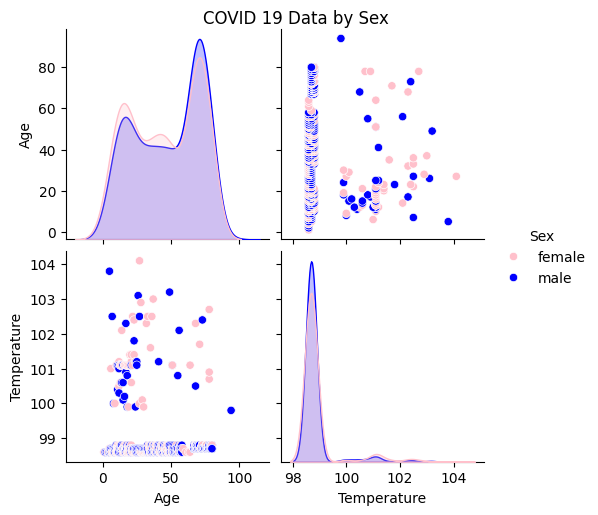




Result


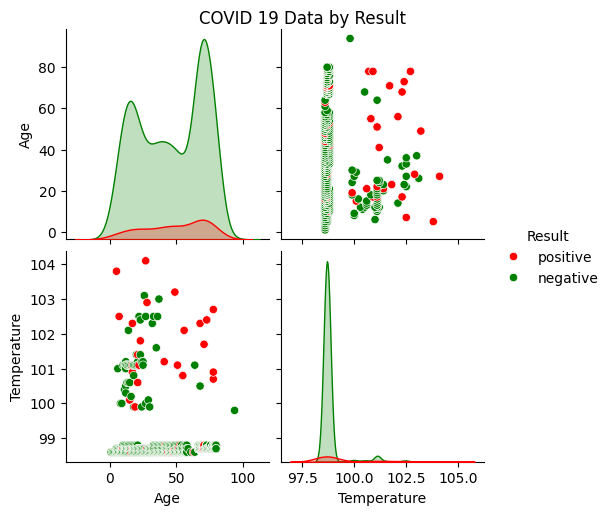




Test_Administrator


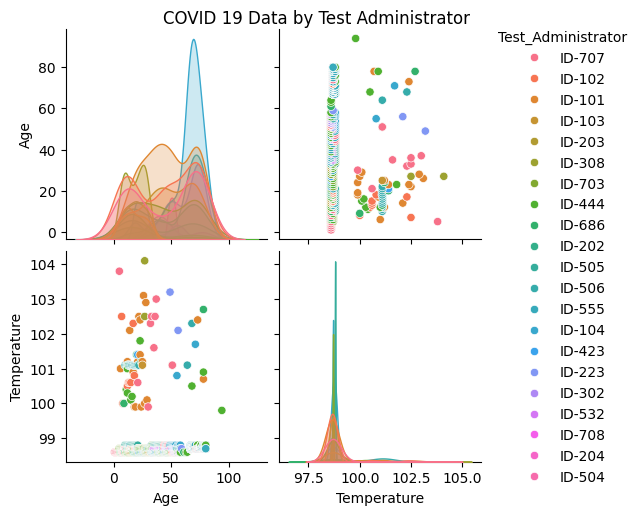




Patient_Experience_Survey


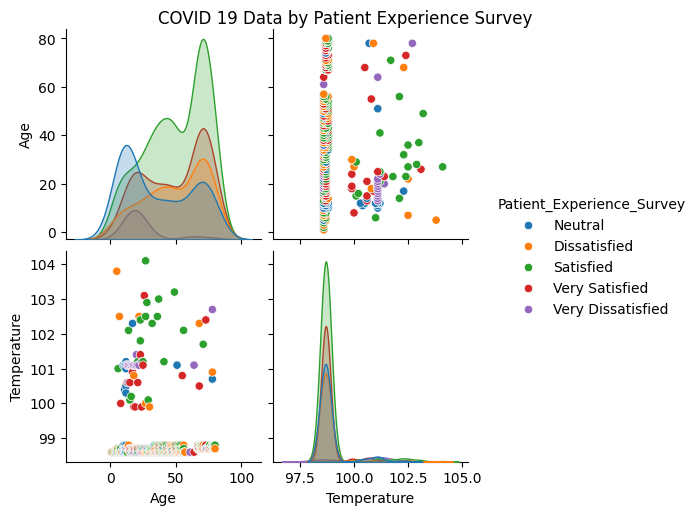




Test_Type


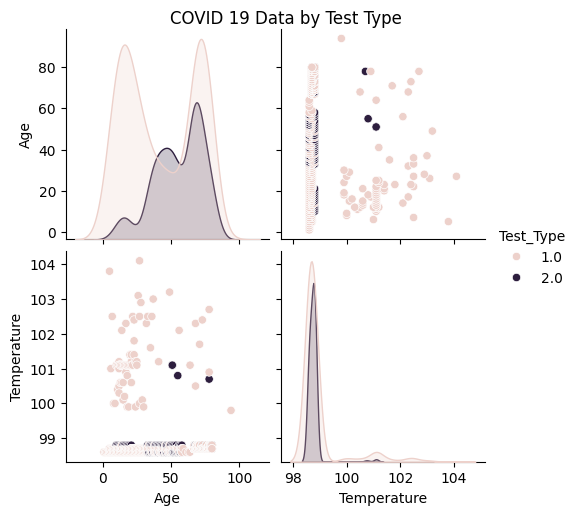




age_quartile


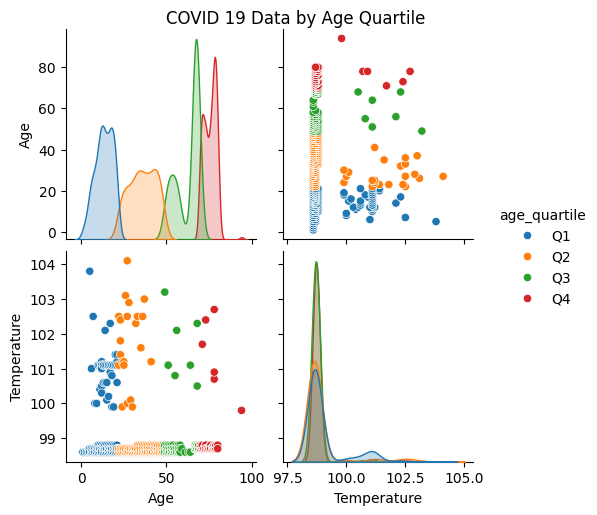




weekend_weekday


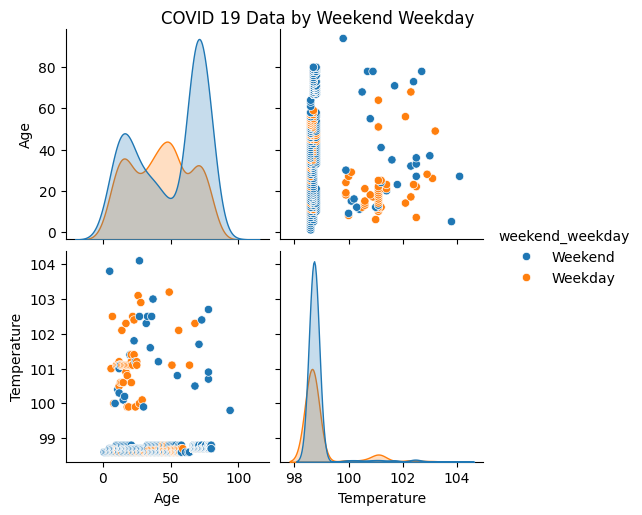

In [12]:
# Import plotting libraries `matplotlib` and `seaborn`.
import matplotlib.pyplot as plt
import seaborn as sns

# Make a pair-plot for each categorical variable in the list we created above.
for category in categorical_cols:
    print(category)

    # Decide on the Palette
    # ---------------------
    # This is just a few rules to give us a nice palette for certain plots instead of
    # relying on the default colormap. It colors 0/False/"negative" as green for "good"
    # outcomes, while 1/True/"positive" are colored red for "bad".
    # Additionally, it uses the traditional blue/pink colorscheme for male and female
    # respectively.
    if set(df[category].dropna()) == {0, 1}:
        palette = {0: "green", 1: "red"}
    elif set(df[category].dropna()) == {True, False}:
        palette = {False: "green", True: "red"}
    elif set(df[category].dropna()) == {"positive", "negative"}:
        palette = {"negative": "green", "positive": "red"}
    elif set(df[category].dropna()) == {"male", "female"}:
        palette = {"male": "blue", "female": "pink"}
    else:
        # If it's none of those situations, just let `seaborn` use whatever color
        # palette it wants.
        palette = None

    # Make sure our categorical column is part of our subset.
    cols_to_plot = columns_good_for_plotting.columns.union([category])
    pairplot = sns.pairplot(df[cols_to_plot], hue=category, palette=palette)

    # Give each plot a title
    pairplot.figure.suptitle(
        f"COVID 19 Data by {category.replace('_', ' ').title()}", y=1.015
    )
    # and show the plot.
    plt.show()

    print("\n\n")

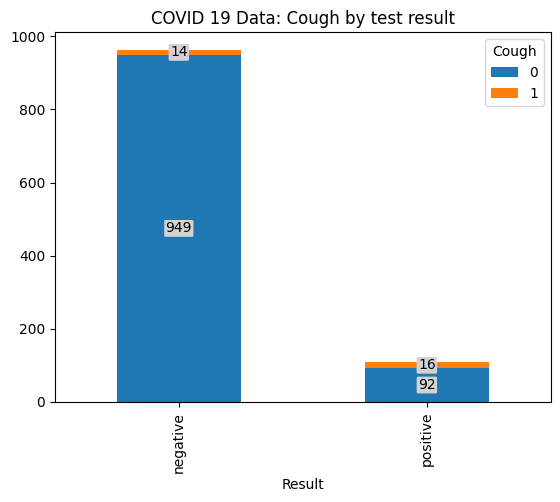

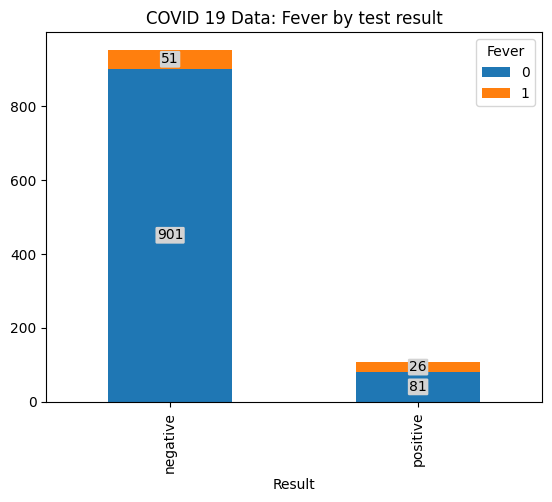

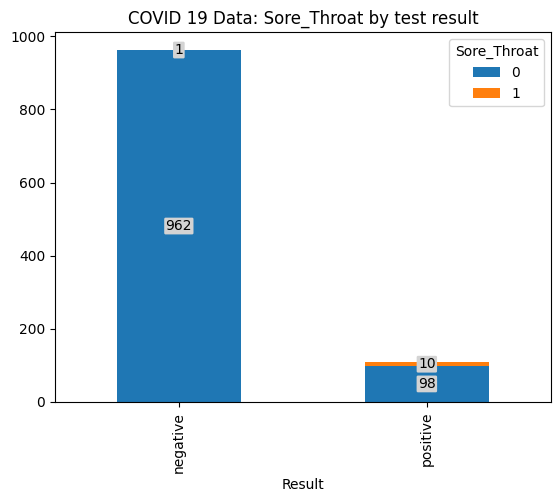

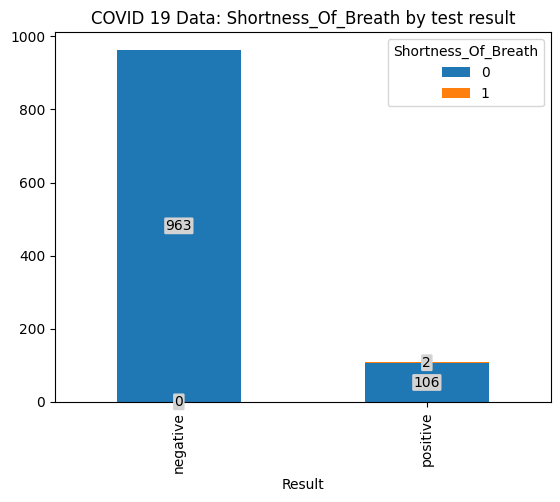

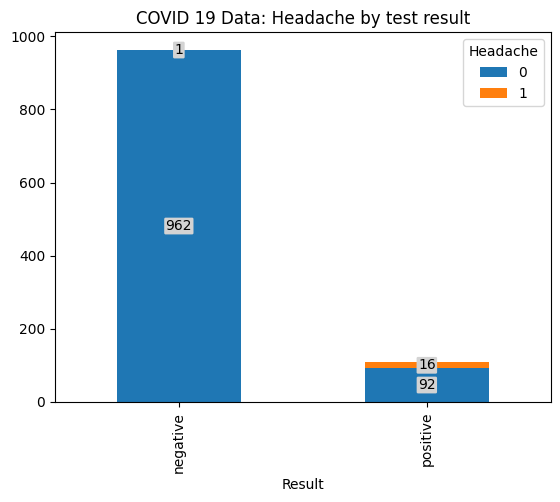

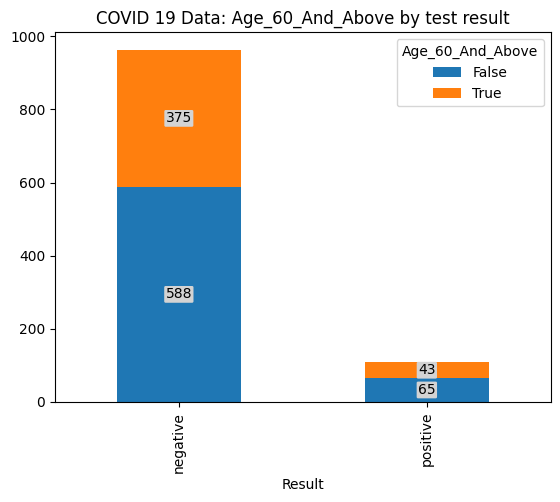

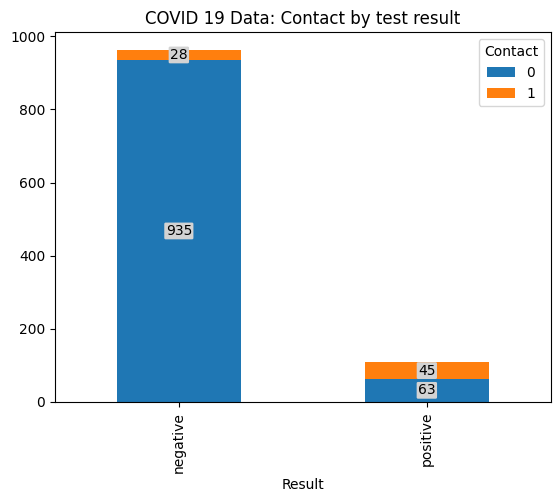

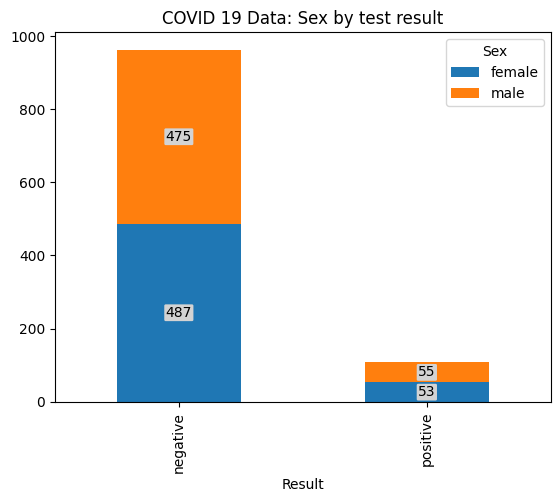

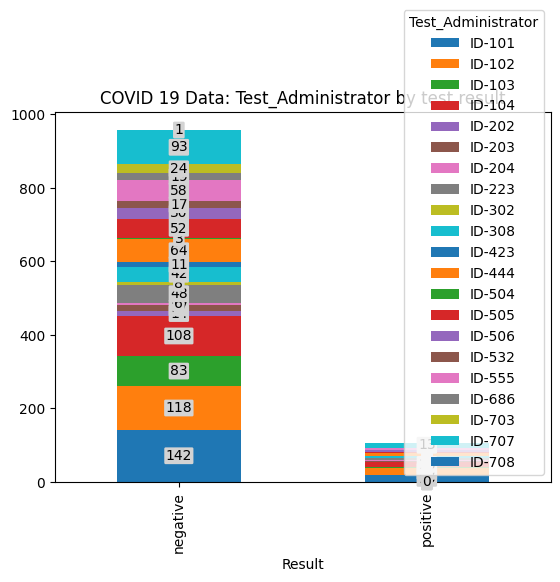

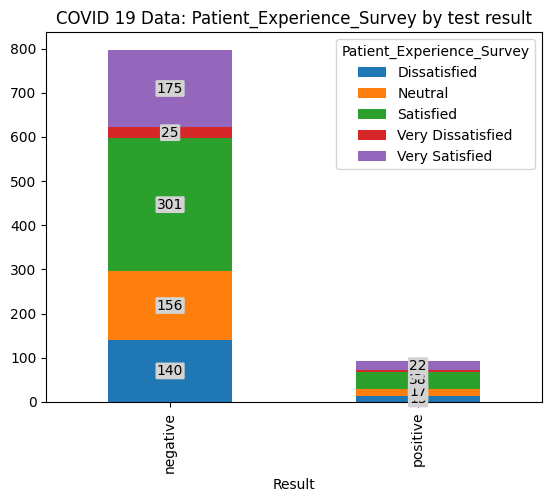

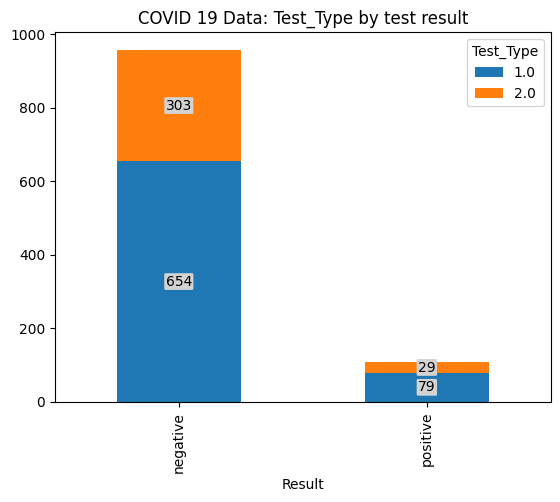

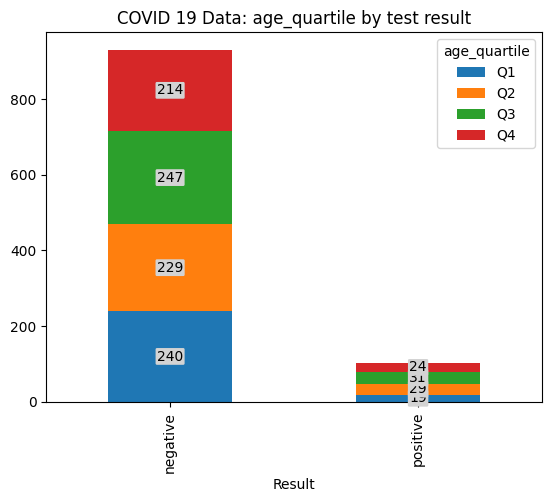

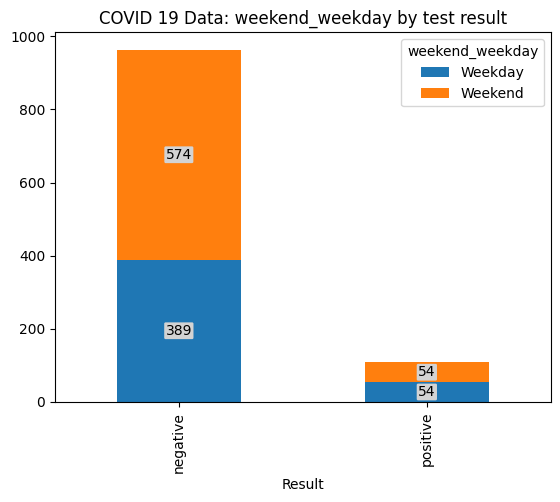

In [13]:
for category in categorical_cols:
    if category == "Result":
        # Can't graph result and result. Just skip this category.
        continue

    ax = (
        df[["Result", category]]
        .value_counts()
        .sort_index()
        .unstack()
        .plot.bar(stacked=True)
    )

    # Add labels to the bars so we can actually see what's going on.
    for bar in ax.containers:
        label_style = {
            "fc": "lightgrey",
            "edgecolor": "none",
            "pad": 0.1,
            "boxstyle": "round",
        }
        ax.bar_label(bar, label_type="center", bbox=label_style)

    # Add a title.
    ax.set_title(f"COVID 19 Data: {category} by test result")

## Export Final Dataset

In [14]:
df.to_excel("BDA-500 - Final COVID Testing Dataset.xlsx", index=False)